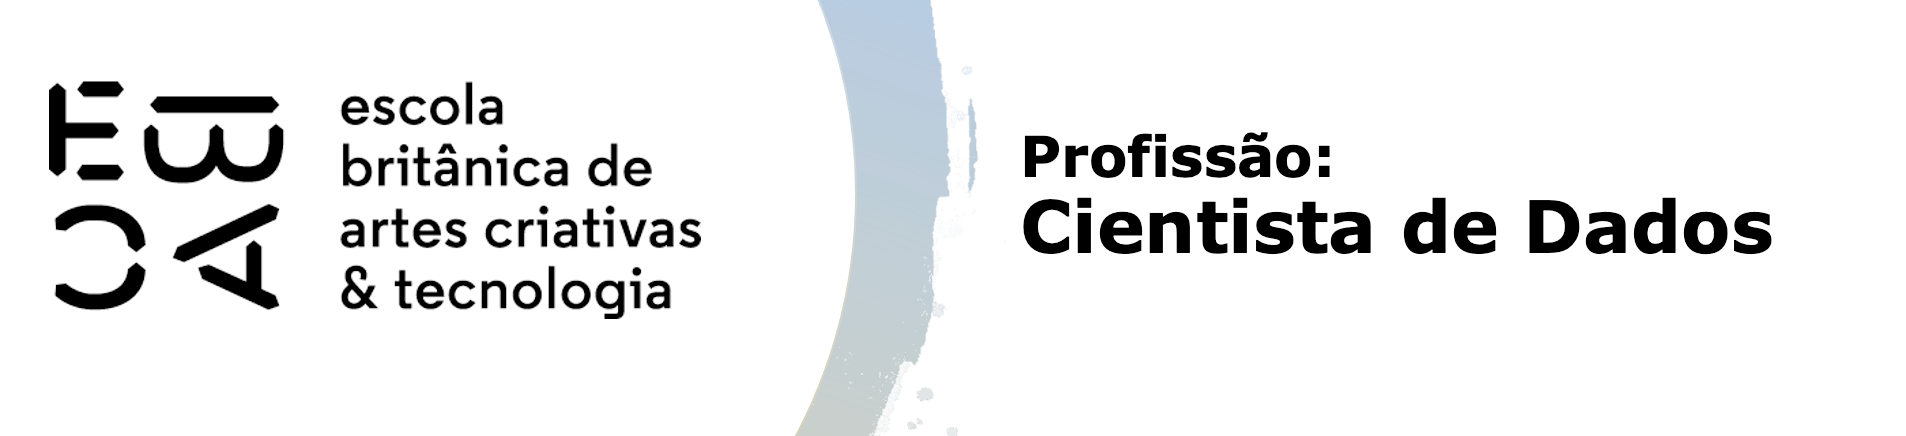

# Tarefa

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?" 

Nosso objetivo é tentar agrupar os clientes conforme seu comportamento de navegação entre páginas administrativas, informativas e de produtos. 

As variáveis estão descritas abaixo (em tradução livre do link indicado).

Por este motivo, o escopo desta análise estará fechado nas primeiras seis variáveis da tabela, referentes a quantidade e tempo de acesso por tipo de página, atributos que falam mais do comportamento de navegação do cliente que de características da página o da época do ano.

|Variavel                |Descrição          | 
|------------------------|:-------------------| 
|Administrative          | Quantidade de acessos em páginas administrativas| 
|Administrative_Duration | Tempo de acesso em páginas administrativas | 
|Informational           | Quantidade de acessos em páginas informativas  | 
|Informational_Duration  | Tempo de acesso em páginas informativas  | 
|ProductRelated          | Quantidade de acessos em páginas de produtos | 
|ProductRelated_Duration | Tempo de acesso em páginas de produtos | 
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  | 
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações | 
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico | 
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) | 
|Month                   | Mês  | 
|OperatingSystems        | Sistema operacional do visitante | 
|Browser                 | Browser do visitante | 
|Region                  | Região | 
|TrafficType             | Tipo de tráfego                  | 
|VisitorType             | Tipo de visitante: novo ou recorrente | 
|Weekend                 | Indica final de semana | 
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

In [218]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler
from tqdm.notebook         import tqdm

import warnings
warnings.filterwarnings("ignore")

In [185]:
df = pd.read_csv('online_shoppers_intention.csv')

In [186]:
df.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

In [187]:
df.Revenue.value_counts(dropna=False)

Revenue
False    10422
True      1908
Name: count, dtype: int64

In [188]:
df.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

In [189]:
print(df.describe())

       Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.00000

In [190]:
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [191]:
colunas = df.iloc[:, 0:6].columns

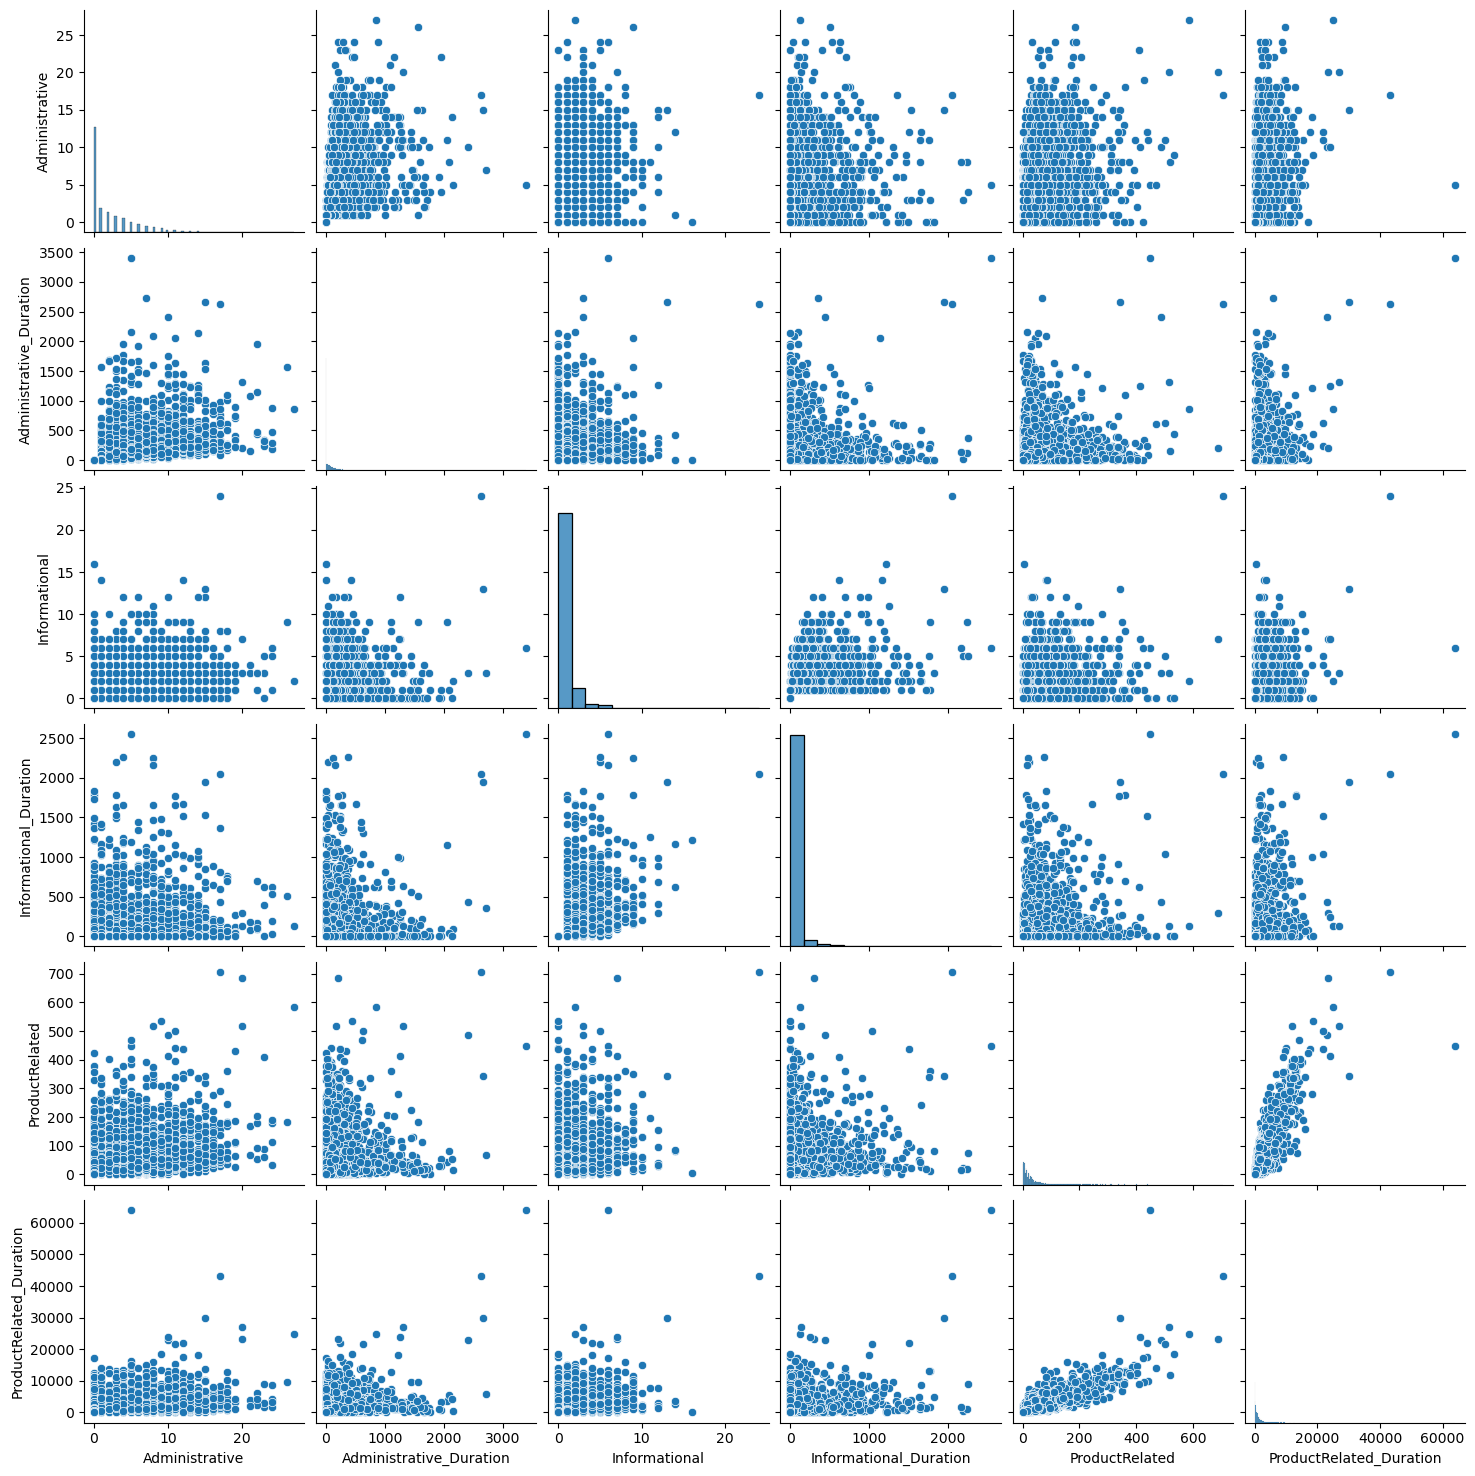

In [192]:
sns.pairplot(data = df[colunas])
plt.show()

In [197]:
#padronizaçao
df_six = df.copy()
colunas_numericas = df_six.select_dtypes(include = 'number').columns
df_six[colunas_numericas] = pd.DataFrame(data=StandardScaler().fit_transform(df_six[colunas_numericas]), 
                                         columns=df_six[colunas_numericas].columns)
df_six

Administrative  Administrative_Duration  Informational  \
0           -0.696993                -0.457191      -0.396478   
1           -0.696993                -0.457191      -0.396478   
2           -0.696993                -0.457191      -0.396478   
3           -0.696993                -0.457191      -0.396478   
4           -0.696993                -0.457191      -0.396478   
...               ...                      ...            ...   
12325        0.206173                 0.363075      -0.396478   
12326       -0.696993                -0.457191      -0.396478   
12327       -0.696993                -0.457191      -0.396478   
12328        0.507228                -0.032916      -0.396478   
12329       -0.696993                -0.457191      -0.396478   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                   -0.244931       -0.691003                -0.624348   
1                   -0.244931       -0.668518                -0.590903   
2                   -0.244931       -0.691003                -0.624348   
3                   -0.244931       -0.668518                -0.622954   
4                   -0.244931       -0.488636                -0.296430   
...                       ...             ...                      ...   
12325               -0.244931        0.478227                 0.307822   
12326               -0.244931       -0.601062                -0.380957   
12327               -0.244931       -0.578577                -0.528063   
12328               -0.244931       -0.376210                -0.443536   
12329               -0.244931       -0.646033                -0.613243   

       BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         3.667189   3.229316   -0.317178   -0.308821   Feb         -1.233426   
1        -0.457683   1.171473   -0.317178   -0.308821   Feb         -0.136078   
2         3.667189   3.229316   -0.317178   -0.308821   Feb          2.058618   
3         0.573535   1.994610   -0.317178   -0.308821   Feb          0.961270   
4        -0.045196   0.142551   -0.317178   -0.308821   Feb          0.961270   
...            ...        ...         ...         ...   ...               ...   
12325    -0.310366  -0.288966    0.342125   -0.308821   Dec          2.058618   
12326    -0.457683  -0.447364   -0.317178   -0.308821   Nov          0.961270   
12327     1.261014   0.897093   -0.317178   -0.308821   Nov          0.961270   
12328    -0.457683  -0.453140   -0.317178   -0.308821   Nov         -0.136078   
12329    -0.457683   0.485525   -0.317178   -0.308821   Nov          0.961270   

        Browser    Region  TrafficType        VisitorType  Weekend  Revenue  
0     -0.790293 -0.894178    -0.762629  Returning_Visitor    False    False  
1     -0.207952 -0.894178    -0.514182  Returning_Visitor    False    False  
2     -0.790293  2.437081    -0.265735  Returning_Visitor    False    False  
3     -0.207952 -0.477771    -0.017289  Returning_Visitor    False    False  
4      0.374389 -0.894178    -0.017289  Returning_Visitor     True    False  
...         ...       ...          ...                ...      ...      ...  
12325  2.121412 -0.894178    -0.762629  Returning_Visitor     True    False  
12326 -0.207952 -0.894178     0.976499  Returning_Visitor     True    False  
12327 -0.207952 -0.894178     2.218733  Returning_Visitor     True    False  
12328 -0.207952 -0.061364     1.721839  Returning_Visitor    False    False  
12329 -0.207952 -0.894178    -0.514182        New_Visitor     True    False  

[12330 rows x 18 columns]

In [201]:
columns_to_drop = df_six.select_dtypes(include=['object', 'string']).columns
df_six = df_six.drop(columns=columns_to_drop)
df_six.head()

Administrative  Administrative_Duration  Informational  \
0       -0.696993                -0.457191      -0.396478   
1       -0.696993                -0.457191      -0.396478   
2       -0.696993                -0.457191      -0.396478   
3       -0.696993                -0.457191      -0.396478   
4       -0.696993                -0.457191      -0.396478   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0               -0.244931       -0.691003                -0.624348   
1               -0.244931       -0.668518                -0.590903   
2               -0.244931       -0.691003                -0.624348   
3               -0.244931       -0.668518                -0.622954   
4               -0.244931       -0.488636                -0.296430   

   BounceRates  ExitRates  PageValues  SpecialDay  OperatingSystems   Browser  \
0     3.667189   3.229316   -0.317178   -0.308821         -1.233426 -0.790293   
1    -0.457683   1.171473   -0.317178   -0.308821         -0.136078 -0.207952   
2     3.667189   3.229316   -0.317178   -0.308821          2.058618 -0.790293   
3     0.573535   1.994610   -0.317178   -0.308821          0.961270 -0.207952   
4    -0.045196   0.142551   -0.317178   -0.308821          0.961270  0.374389   

     Region  TrafficType  Weekend  Revenue  
0 -0.894178    -0.762629    False    False  
1 -0.894178    -0.514182    False    False  
2  2.437081    -0.265735    False    False  
3 -0.477771    -0.017289    False    False  
4 -0.894178    -0.017289     True    False

## Número de grupos

Utilize as técnicas vistas em aula que te ajudem a decidir pelo número de grupos a ser utilizados.

In [202]:
sse = []
k_range = range(1, 11)  
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(df_six)
    sse.append(kmeans.inertia_)  

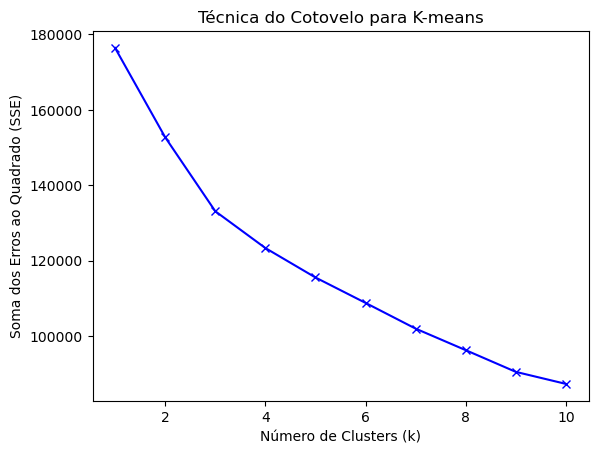

In [203]:
plt.plot(k_range, sse, 'bx-')  
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Soma dos Erros ao Quadrado (SSE)')
plt.title('Técnica do Cotovelo para K-means')
plt.show()

  0%|          | 0/9 [00:00<?, ?it/s]

   n_clusters  silhueta_media
0           2        0.624690
1           3        0.508982
2           4        0.502603
3           5        0.515343
4           6        0.493008
5           7        0.471517
6           8        0.463764
7           9        0.425160
8          10        0.414842


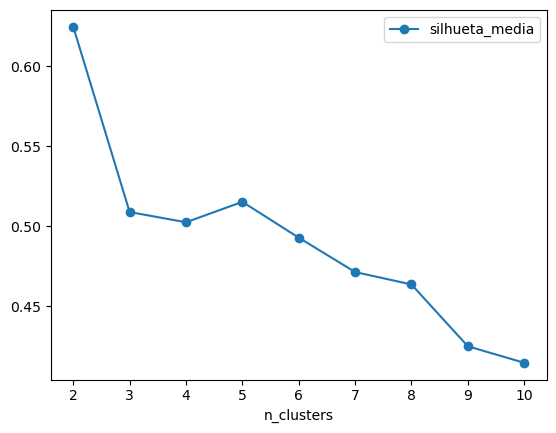

In [220]:
silhuetas = []

max_clusters = 10

for n_clusters in tqdm(range(2, max_clusters + 1)):
    
    km = KMeans(n_clusters = n_clusters, 
                n_init = 'auto').fit(df_six[colunas])
    
    silhuetas.append(silhouette_score(X = df_six[colunas], 
                                      labels = km.labels_))

    nomes_grupos = ['grupo_' + str(n) for n in range(n_clusters)]
    
    df_six['grupos_'+str(n_clusters)] = pd.Categorical.from_codes(codes = km.labels_, 
                                                                  categories = nomes_grupos)    

df_silhueta = pd.DataFrame(data = {'n_clusters': list(range(2, max_clusters + 1)), 
                                   'silhueta_media': silhuetas})
print(df_silhueta)
df_silhueta.plot.line(x = 'n_clusters', 
                      y = 'silhueta_media', 
                      marker = 'o')

plt.show()

## Avaliação dos grupos

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final. 
- Se puder, sugira nomes para os grupos.

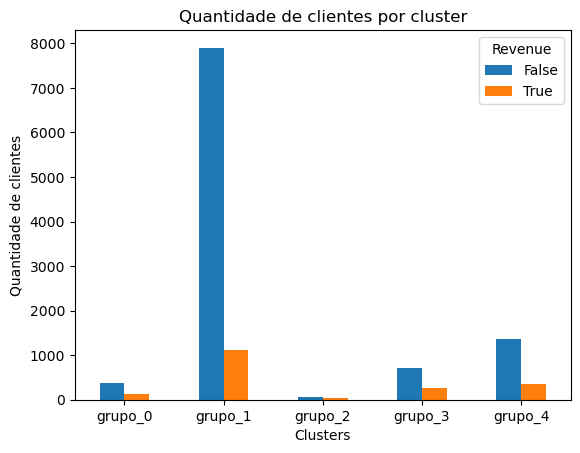

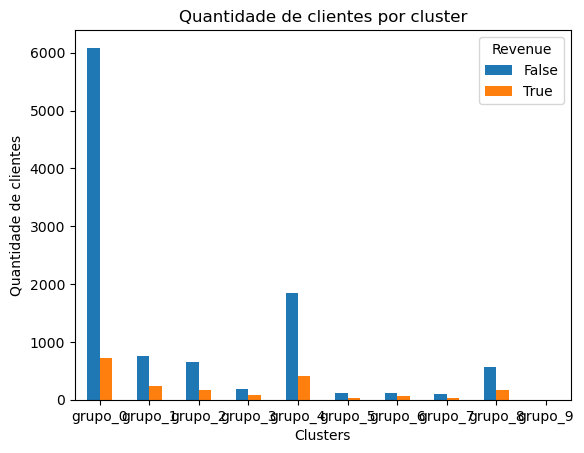

In [221]:
def cluster_barplot(data: pd.DataFrame, coluna_cluster: str) -> None:
  
    df_agrupado = data.groupby([coluna_cluster, 'Revenue'])['Revenue'].count().unstack()
    
    ax = df_agrupado.plot.bar(rot=0)
    
    ax.set_ylabel('Quantidade de clientes')
    ax.set_xlabel('Clusters')
    plt.title('Quantidade de clientes por cluster')
    
    plt.show()

cluster_barplot(df_six, 'grupos_5')    

cluster_barplot(df_six, 'grupos_10')

In [222]:
df_six_ = df_six.copy()

df_six_['grupos_2'] = df_six_['grupos_2'].cat.rename_categories({'grupo_0': 'Não interessados', 
                                                                 'grupo_1': 'Compradores'})

df_six_['grupos_3'] = df_six_['grupos_3'].cat.rename_categories({'grupo_0': 'Não interessados', 
                                                                 'grupo_1': 'Potenciais compradores', 
                                                                 'grupo_2': 'Compradores'})

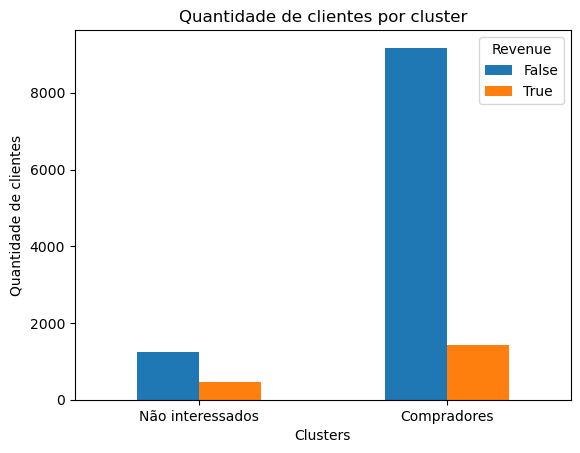

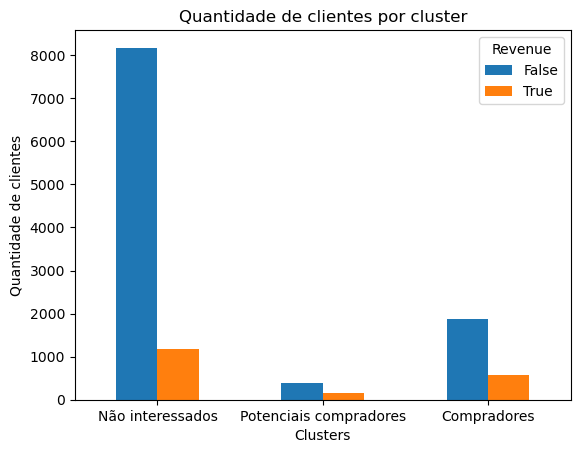

In [225]:
cluster_barplot(df_six_, 'grupos_2')

cluster_barplot(df_six_, 'grupos_3')

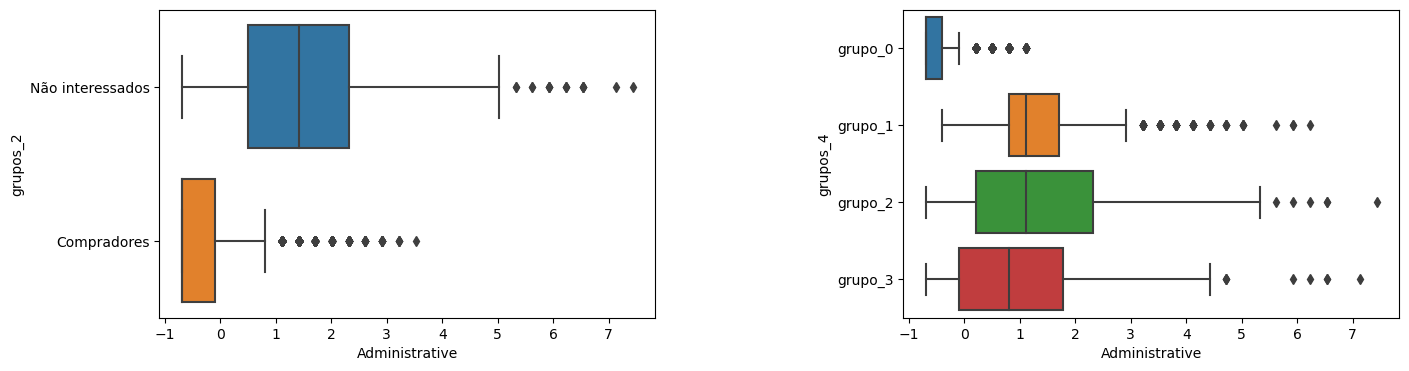

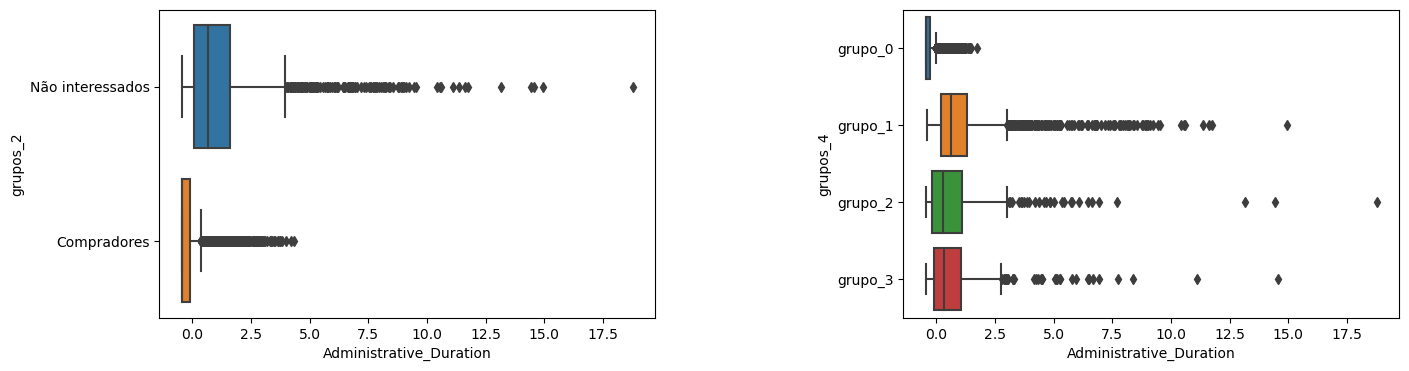

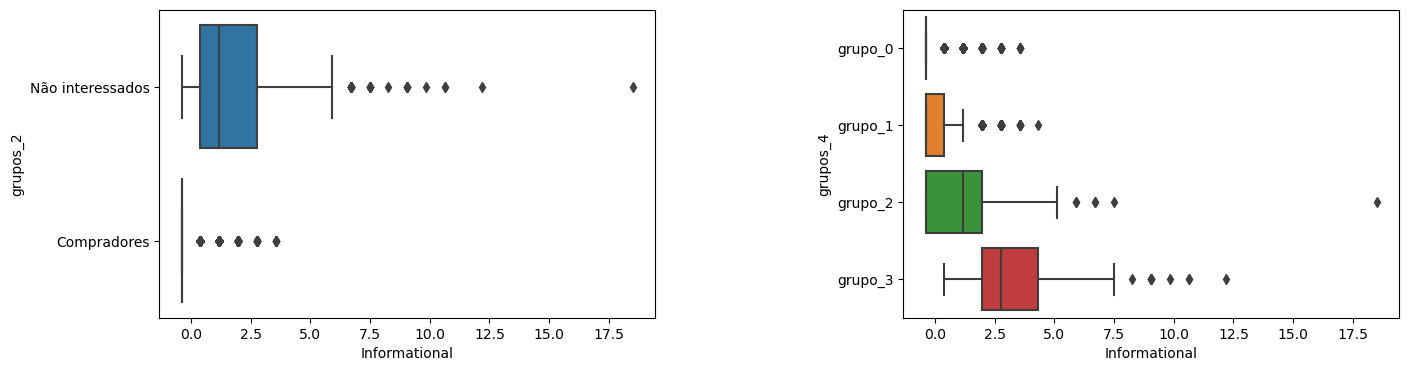

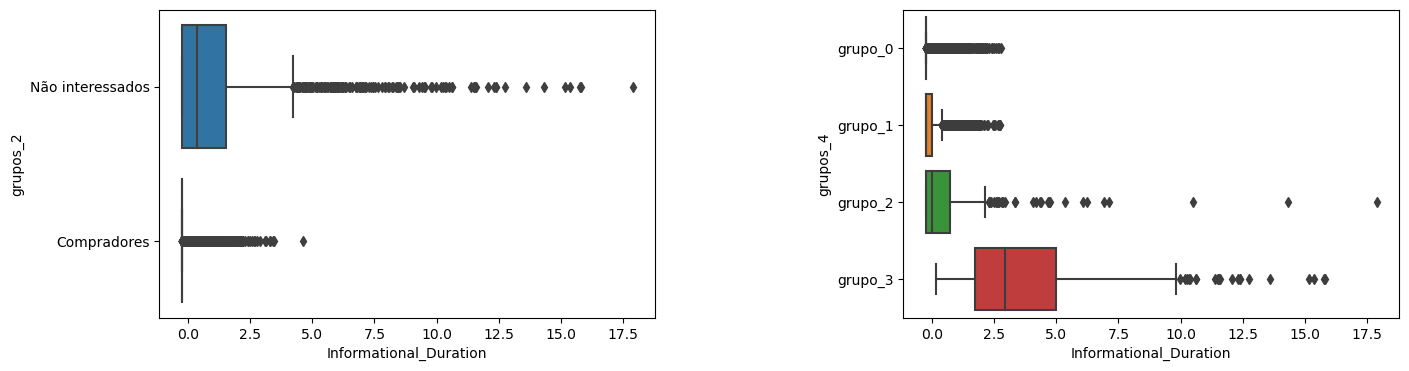

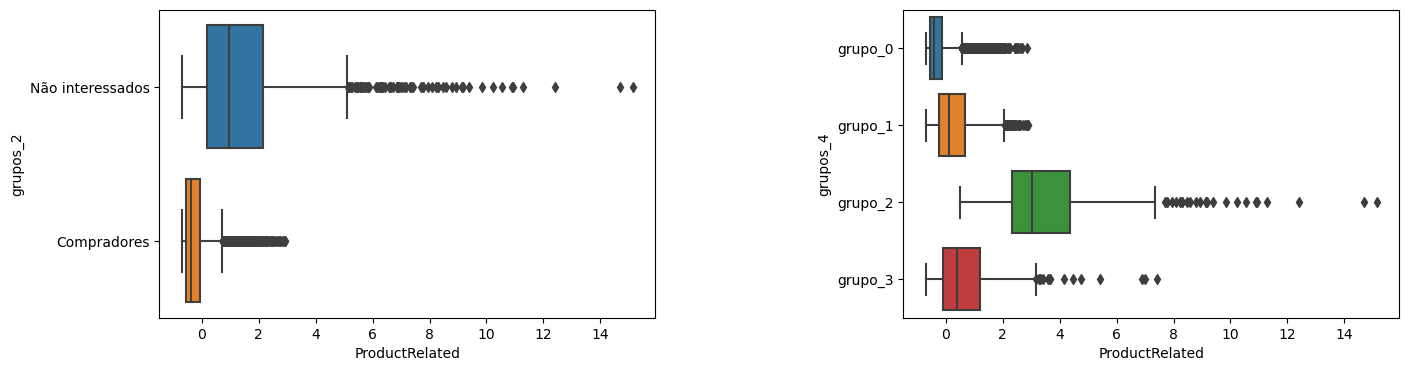

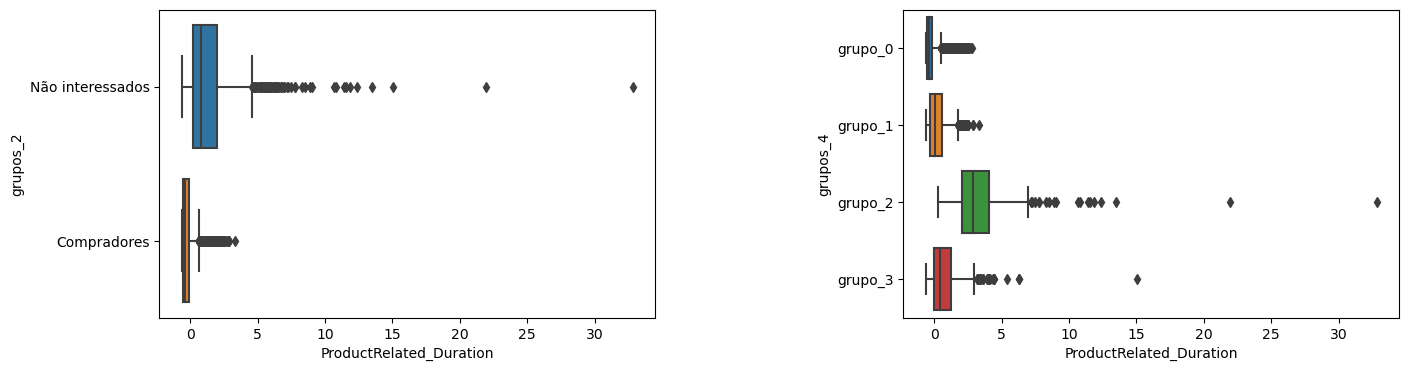

In [223]:
for n in range(6):
    fig, ax = plt.subplots(1, 2, figsize=(16, 4))
    sns.boxplot(data=df_six_, x=colunas[n], y='grupos_2', ax=ax[0])
    sns.boxplot(data=df_six_, x=colunas[n], y='grupos_4', ax=ax[1])
    plt.subplots_adjust(wspace=0.5)

    plt.show()

## Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*). 
- Qual grupo possui clientes mais propensos à compra?

In [227]:
pd.crosstab(df_six_['Revenue'], df_six_['grupos_2'], normalize='all', margins=True)

grupos_2  Não interessados  Compradores       All
Revenue                                          
False             0.101217     0.744039  0.845255
True              0.038118     0.116626  0.154745
All               0.139335     0.860665  1.000000

<blockquote>
No caso de um agrupamento com 2 clusters, podemos nomear o grupo_0 como "Não interessados", referindo-se a clientes com menor chance de realizar compras. Já o grupo_1 pode ser chamado de "Compradores", representando aqueles com maior probabilidade de comprar.

Embora haja uma diferença significativa na proporção de clientes marcados como "False" e "True" na variável 'Revenue', o grupo_0 conseguiu identificar a maioria dos clientes com menor propensão a comprar. Curiosamente, este grupo acertou cerca de 74% dos casos onde a variável 'Revenue' é "False" (indicando que os clientes não compraram), o que representa 85% do total de registros. Por outro lado, o grupo_1, que engloba os clientes mais propensos a comprar, acertou aproximadamente 4% dos casos onde a variável 'Revenue' é "True" (indicando compradores), correspondendo a 15% do total de dados.</blockquote>

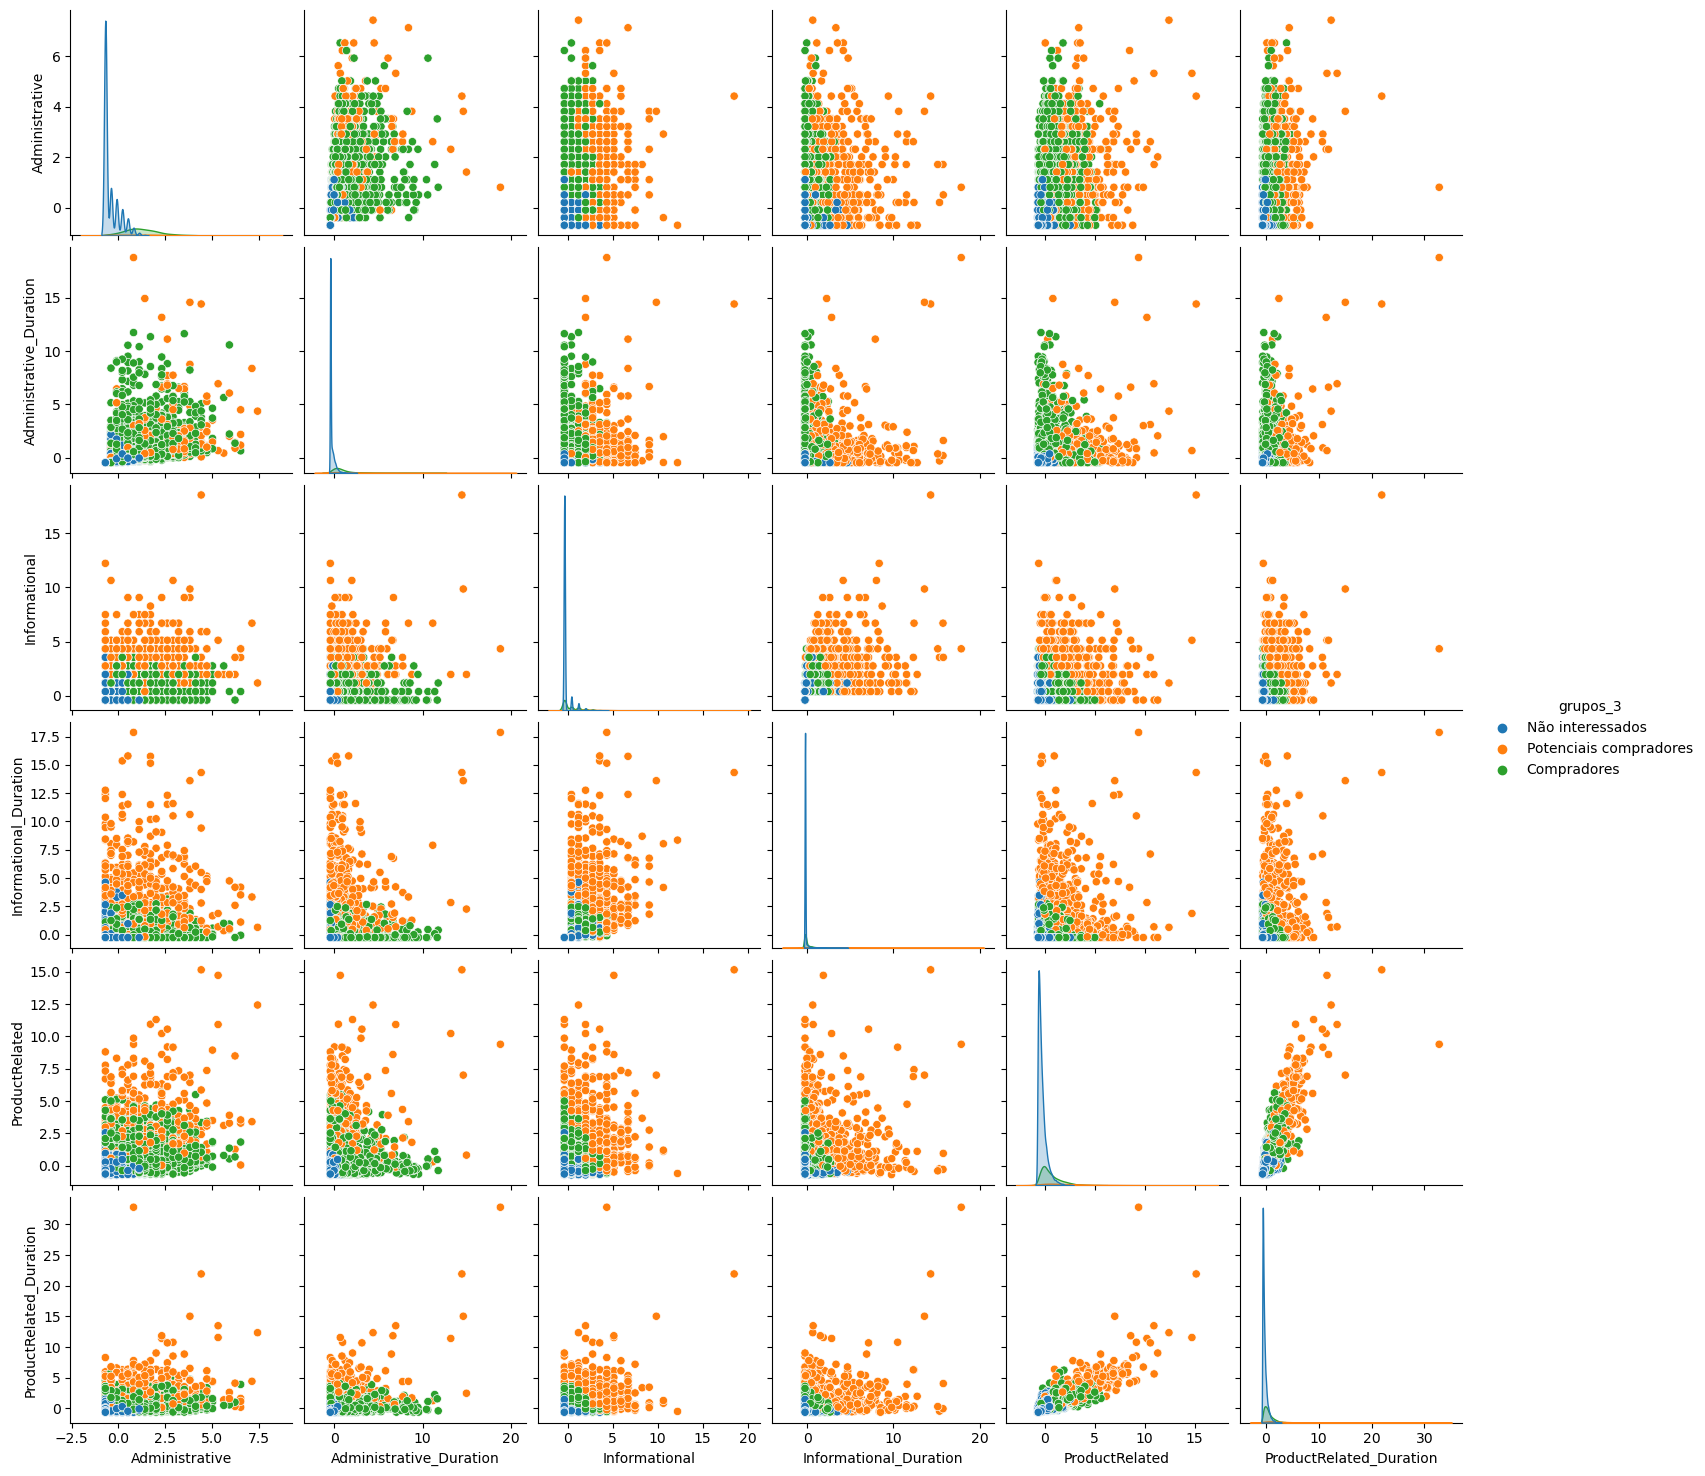

In [231]:
sns.pairplot(data=df_six_[list(colunas) + ['grupos_3']], hue='grupos_3')
plt.show()